## Take Home Challenge
## Part 1 : Exploratory Data Analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15 minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.


## 1. Load and Explore the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Lets checkout the data

logins = pd.read_json('logins.json')
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
#Lets change it to an actual date time

logins['login_time'] = pd.to_datetime(logins['login_time'])

In [4]:
logins.shape

(93142, 1)

In [5]:
## Lets see what type of data we have

logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


The data looks good! There are no missing values from the data set of 93,142.

In [6]:
## Aggragate by 15 mins intervals

logins.set_index('login_time', inplace=True)
logins['count'] = 1
logins = logins.resample('15T').sum()


In [7]:
logins= pd.DataFrame(logins)

In [8]:
logins.reset_index(inplace=True)

In [9]:
logins.head()

,login_time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


In [10]:
logins.tail()

,login_time,count
9783,1970-04-13 17:45:00,5
9784,1970-04-13 18:00:00,5
9785,1970-04-13 18:15:00,2
9786,1970-04-13 18:30:00,7
9787,1970-04-13 18:45:00,6


The data is from January 1st, 1970 to April 13th, 1970. Four months of data.

In [11]:
logins.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


## 2. Key statistics 

In [12]:
logins['count'].min()

0

In [13]:
logins[logins['count'] == 0]

,login_time,count
6,1970-01-01 21:30:00,0
33,1970-01-02 04:15:00,0
41,1970-01-02 06:15:00,0
88,1970-01-02 18:00:00,0
147,1970-01-03 08:45:00,0
...,...,...
9555,1970-04-11 08:45:00,0
9734,1970-04-13 05:30:00,0
9736,1970-04-13 06:00:00,0
9738,1970-04-13 06:30:00,0


The data is from January 1st, 1970 to April 13th, 1970. Four months of data.

There where many times when there was no usage.

In [14]:
logins['count'].max()

73

In [15]:
logins[logins['count'] == 73]

,login_time,count
5602,1970-03-01 04:30:00,73


In [16]:
#Lets see what day of the week we had the most logins on

d = pd.Timestamp('1970-03-01')
print(d.dayofweek, d.day_name())

6 Sunday


The most usage took place on a Sunday. More people are out and about on the weekends.

In [17]:
logins['count'].mean()

9.51593788312219

The average usage is 9.51.

In [18]:
logins['count'].std()

8.328818383338547

The standard deviation is relatively high. This means there is a lot of fluctions from each timestamp.

## 3. Visualizing the Data

###  3.1 The entire Dataset

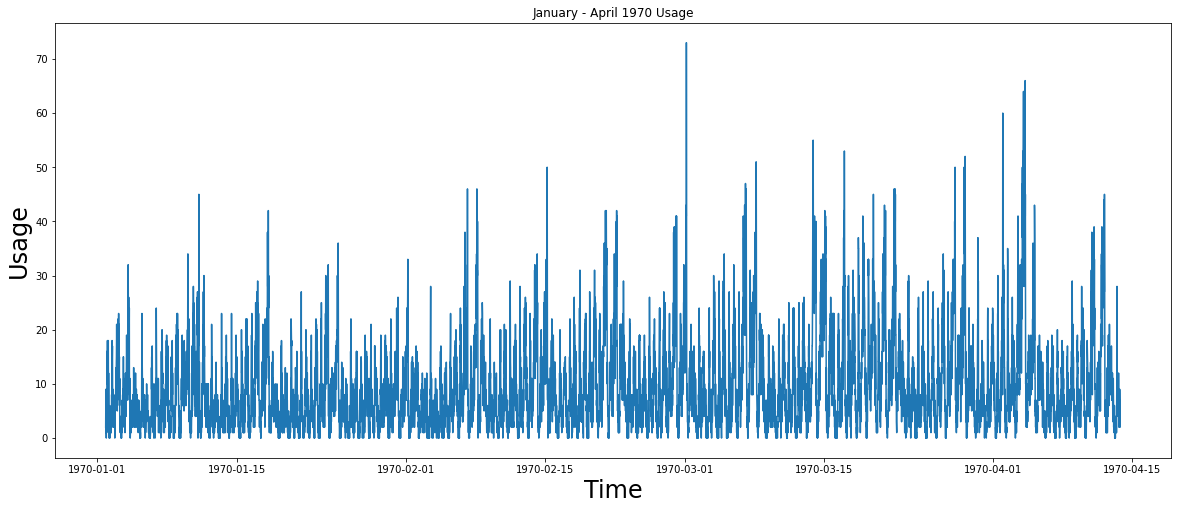

In [19]:
# Here is the entire dataset

x=logins['login_time']
y=logins['count']

plt.figure(figsize = (20,8))
plt.title('January - April 1970 Usage')
plt.plot(x,y)
plt.ylabel('Usage', fontsize=24)
plt.xlabel('Time', fontsize=24)
plt.show()

It looks as if there is high usage on the weekends or later in the week. At the start of the week there is not as much action.

### 3.2 The break down of each hour

In [20]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9788 entries, 0 to 9787
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  9788 non-null   datetime64[ns]
 1   count       9788 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 153.1 KB


In [21]:
# Which hours have the most logins

logins['hour'] = logins['login_time'].dt.hour
diff_hour = logins[['count', 'hour']]
diff_hour = logins.groupby('hour').sum().reset_index()
diff_hour.sort_values(by='count', ascending=False)

,hour,count
22,22,6607
1,1,6317
23,23,6058
0,0,5993
2,2,5800
11,11,5799
21,21,5623
4,4,5034
12,12,4964
3,3,4831


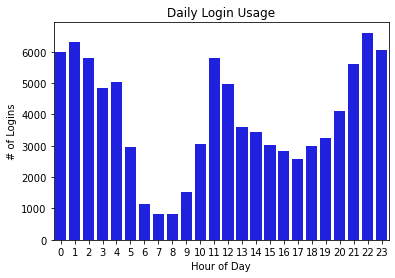

In [22]:
sns.barplot(x= 'hour', y='count', data=diff_hour, color='blue')
plt.xlabel('Hour of Day')
plt.title('Daily Login Usage')
plt.ylabel('# of Logins')
plt.show()

This graph shows us that usage is highest in 22nd hour/10pm. The logins are high in the early morning from the 0-4 hour/12-4am. Then declines in the morning from 5-8am. It increase gradually from 9-11am then declines from 11am-5pm. It starts to rise from 5pm to 10pm. Peak hours are late at night and very early in the morning as well as midday.

### 3.3 Days of the Week

In [23]:
# Lets see which days are the busiest

logins['Day of Week'] = logins['login_time'].dt.dayofweek
day_count = logins.groupby('Day of Week').sum().reset_index()

day_count['Day of Week'] = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday', 'Saturday', 'Sunday']
day = day_count[['Day of Week','count']]
day.sort_values(by='count', ascending=False)


,Day of Week,count
5,Saturday,19377
6,Sunday,18167
4,Friday,15208
3,Thursday,11960
2,Wednesday,10339
1,Tuesday,9268
0,Monday,8823


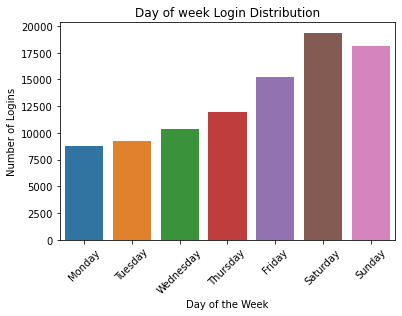

In [24]:
sns.barplot(x= 'Day of Week', y='count', data=day_count)
plt.xlabel('Day of the Week')
plt.xticks(rotation = 45)
plt.title('Day of week Login Distribution')
plt.ylabel('Number of Logins')
plt.show()

Here we can see that logins increase as the week goes on. There is a small drop off on Sundays.

## Part 2 ‐ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

**1) What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?**

The key measurement of success would be to see if it is beneficial to customers and drivers to serve both cities. I would measure three variables to see if the experiment is worth it:

* If it reduces wait times for customer
* Increases profit for the drivers
* Is it worth it for the city to reimburse the drivers for the toll
        
These three variables are the most valuable aspects of the experiment. The most important element to customers is convenience of obtaining a ride and the city wants happy customers and less congestion on their roads. The drivers are potentially interested in making more money by spending time in a different city. The city wants to know if it is worth it to pay the tolls by sending drivers across the bridge.

**2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:**

We would implement this by conducting an A/B test.

**a) how you will implement the experiment:**

We would collect data from drivers, tolls, and customers from before and after the experiment and compare them. We would compare average wait times before and after the change. Also to compare profits as well before and after the experiment. Lastly, we could look at the data on the tolls each city paid for the drivers and compare it to reduced traffic during peak hours and customer ratings before and after.

**b) what statistical test(s) you will conduct to verify the significance of the observation:**

We would do a null hypothesis test on the three variables to verify the significance of the observation. Our null hypothesis would be that nothing has changed by paying for the drivers tolls by serving both cities. This would indicate that each individual variable all had the same mean before and after the experiment. For example the mean of profits for all drivers is the same before and after. We could do a trail of 12 months for seasonal adjustments. Here we could compare the data for every month before and after. Now we would test our null hypothesis on each variable.

* For wait times: The p-value would be that a customer waited 60 seconds less not in the experiment. This is the probability that a customer waited less before the experiment. If this happened less than 5% of the time then we can reject the null hypothesis and it is highly unlikely to happen. Then the experiment of paying for tolls and having drivers go to opposite cities is worth paying for the tolls. This is statistically significant.

* Profits: The p-value would be that the drivers made 20% more not in the experiment. This is the probability that a driver made more money before the experiment. If this happened less than 5% of the time then we can reject the null hypothesis and it is highly unlikely to happen. Then the experiment is a success and is statistically significant.

* Toll Payment: The p-value would be that the city had higher customer ratings and less traffic not in the experiment. This is the probability that customers were happier and had less wait times in traffic before the experiment. If this happened less than 5% of the time then we can reject the null hypothesis and it is highly unlikely to happen. Then the experiment is a success and is statistically significant.

**c) how you would interpret the results and provide recommendations to the city operations team along with any caveats:**

If we reject each of these null hypothesis then we know that the city should continue the program. If the numbers from the data do not express an improvement they should go back to the drivers staying in their individual cities.
The caveats are the quality and length of the experiment. Issues like will the drivers actually go to the opposite cities and increased traffic at certain times are a few of the issues that might come from the experiment. The city would need to work out these different issues by implementing the project as they arise.


## Part 3 ‐ Predictive modeling


Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.


## 1. Import Packages & Load Data

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns
import sklearn

In [26]:
df = pd.read_json('ultimate_data_challenge.json')

## 2. EDA

In [27]:
df.head(15)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0
9,Winterfell,1,2014-01-03,NaN,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


Here it looks like there is some data missing from the average rating of the driver, phone and average rating by driver. We need to explore these three columns and figure out what to do with the null values.

### 2.1 Phone Column Nulls

In [29]:
df['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [30]:
df['phone'].isnull().sum()

396

More than likely a the 396 riders didnt have a phone. Lets fill in the null values as 'No Phone'.

In [31]:
df['phone'].fillna('No Phone', inplace=True)

In [32]:
df['phone'].value_counts()

iPhone      34582
Android     15022
No Phone      396
Name: phone, dtype: int64

### 2.2 Average Rating of Driver Nulls

In [33]:
df['avg_rating_of_driver'].isnull().sum()

8122

In [34]:
df['avg_rating_of_driver'].describe()

count    41878.000000
mean         4.601559
std          0.617338
min          1.000000
25%          4.300000
50%          4.900000
75%          5.000000
max          5.000000
Name: avg_rating_of_driver, dtype: float64

In [35]:
df['avg_rating_of_driver'].value_counts().head(15)

5.0    20771
4.0     4193
4.5     2498
4.8     2430
4.7     1945
4.9     1771
4.3     1487
4.6     1143
3.0     1003
4.4      829
4.2      601
3.5      488
3.8      428
4.1      398
3.7      364
Name: avg_rating_of_driver, dtype: int64

The average rating of the driver has a negitive skew as most of the ratings are towards higher numbers. So we will use the median to fill in the null values.

In [36]:
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].median())

In [37]:
df['avg_rating_of_driver'].describe()

count    50000.000000
mean         4.650038
std          0.575601
min          1.000000
25%          4.500000
50%          4.900000
75%          5.000000
max          5.000000
Name: avg_rating_of_driver, dtype: float64

Our mean went up by .05% after filling in the nan values with the median.

### 2.3 Average Rating by Driver

In [38]:
df['avg_rating_by_driver'].isnull().sum()

201

In [39]:
df['avg_rating_by_driver'].describe()

count    49799.000000
mean         4.778158
std          0.446652
min          1.000000
25%          4.700000
50%          5.000000
75%          5.000000
max          5.000000
Name: avg_rating_by_driver, dtype: float64

In [40]:
df['avg_rating_by_driver'].value_counts().head(15)

5.0    28508
4.8     4537
4.7     3330
4.9     3094
4.5     2424
4.6     2078
4.0     1914
4.3     1018
4.4      860
3.0      602
4.2      342
3.5      199
3.7      195
1.0      181
2.0      126
Name: avg_rating_by_driver, dtype: int64

Once again the average rating by the driver has a negitive skew as most of the ratings are towards higher numbers. So we will use the median to fill in the null values.

In [41]:
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].median())

In [42]:
df['avg_rating_by_driver'].describe()

count    50000.000000
mean         4.779050
std          0.445974
min          1.000000
25%          4.700000
50%          5.000000
75%          5.000000
max          5.000000
Name: avg_rating_by_driver, dtype: float64

Here our average rating by the driver went up .001%.

### 2.4 Data Statistics

In [43]:
df.shape

(50000, 12)

In [44]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2.278200,4.650038,1.074764,8.849536,60.926084,5.796827,4.779050
std,3.792684,0.575601,0.222336,19.958811,37.081503,5.707357,0.445974
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.500000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


### 2.5 Change Columns to Date Time

The signup date and last trip date columns are strings. We need to change it to a date time

In [45]:
df['last_trip_date'] = pd.to_datetime(df.last_trip_date)
df['signup_date'] = pd.to_datetime(df.signup_date)

Lets check the timeframe on our data:

In [46]:
df[['signup_date', 'last_trip_date' ]].describe(datetime_is_numeric=True)

,signup_date,last_trip_date
count,50000,50000
mean,2014-01-16 13:04:20.352000,2014-04-19 08:02:04.992000256
min,2014-01-01 00:00:00,2014-01-01 00:00:00
25%,2014-01-09 00:00:00,2014-02-14 00:00:00
50%,2014-01-17 00:00:00,2014-05-08 00:00:00
75%,2014-01-24 00:00:00,2014-06-18 00:00:00
max,2014-01-31 00:00:00,2014-07-01 00:00:00


Here we can see that our time frame is January 1st 2014 and the last trip date is July 1st 2014. 

### 2.6 Create Y Variable- Riders Retained in June

Lets check how many users were retained. We consider a user retained if they were active in the preceding 30 days.

In [47]:
trips30 = df['trips_in_first_30_days'].value_counts(normalize=True)*100
trips30.head(10)

0    30.780
1    28.216
2    14.804
3     7.576
4     5.124
5     3.232
6     2.268
7     1.638
8     1.178
9     0.942
Name: trips_in_first_30_days, dtype: float64

We had 30.78% that were not retained in the next 30 days. Lets calculate how many that were retained within 30 days.

In [48]:
1-.30780

0.6921999999999999

**Question 1: Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?**

69.219% Users where retained in the last 30 days.

Now we need to create our Y variable that we will predict, which is whether or not a user will be active in their 6th month on the system. It will be any rider who got a ride in the month of June.

In [49]:
df['retained'] = (df.last_trip_date > '2014-05-31')*1

In [50]:
df['retained'].describe()

count    50000.000000
mean         0.376080
std          0.484405
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: retained, dtype: float64

In [51]:
df.retained.value_counts()

0    31196
1    18804
Name: retained, dtype: int64

In [52]:
31196/50000

0.62392

In [53]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


## 3. Visualizations

### 3.1 Heat Map

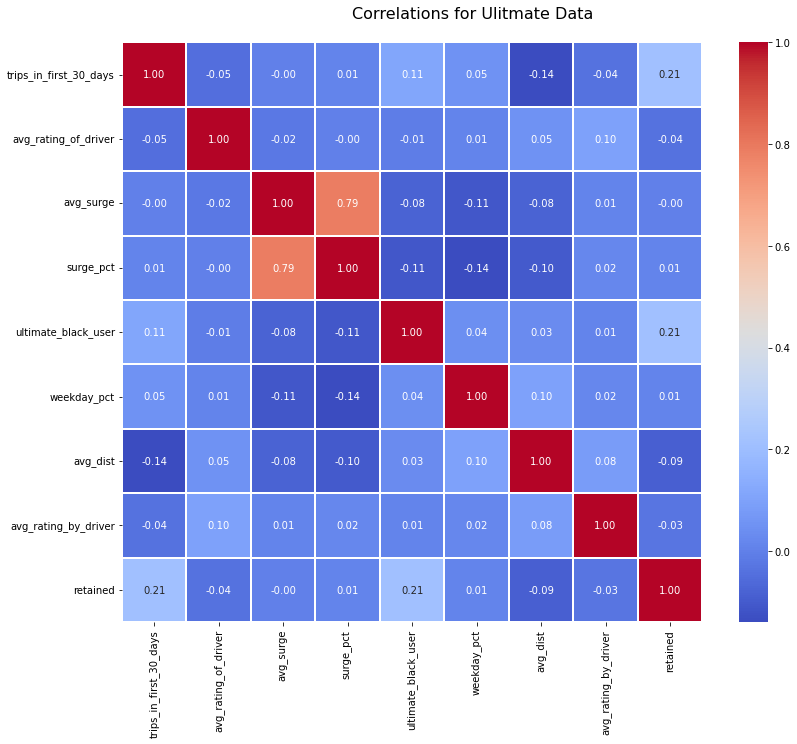

In [54]:
corrmat= df.corr()
f, ax = plt.subplots(figsize= (13,10))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap='coolwarm', fmt='.2f', linewidths=.05)
f.subplots_adjust(top=.93)
t= f.suptitle('Correlations for Ulitmate Data', fontsize=16)

In [55]:
corrmat['retained'].sort_values(ascending=False)

retained                  1.000000
trips_in_first_30_days    0.210463
ultimate_black_user       0.205002
surge_pct                 0.011797
weekday_pct               0.009693
avg_surge                -0.003333
avg_rating_by_driver     -0.027548
avg_rating_of_driver     -0.041082
avg_dist                 -0.092780
Name: retained, dtype: float64

Trips in the first 30 days and ultimate black user have the highest correlation with our Y variable. So perhaps a ultimate black user is more inclined to be a repeat customer. Lets look at a table of retained and ultimate black users.

### 3.2 Table of  Ultimate Black Users by Retained or Not

In [56]:
retained_ubu = pd.crosstab(index=df['retained'],columns=df['ultimate_black_user'], margins=True)   
retained_ubu.index= ["Not Retained","Retained","Total"]
retained_ubu.columns = ["Not Ultimate Black User","Ultimate Black User","Total"]
retained_ubu

,Not Ultimate Black User,Ultimate Black User,Total
Not Retained,21839,9357,31196
Retained,9307,9497,18804
Total,31146,18854,50000


Looks like it is half and half almost for users who are retained or not and is an ultimate black user and not.

### 3.3 Scatter Plot of Retained and Not Retained vs. Average Distance

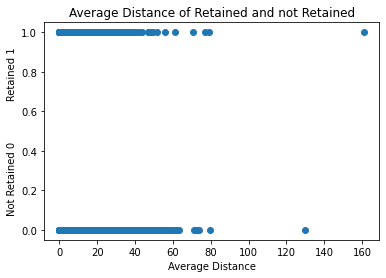

In [57]:
plt.scatter(df['avg_dist'], df['retained'])
plt.xlabel('Average Distance')
plt.ylabel('Not Retained 0             Retained 1')
plt.title('Average Distance of Retained and not Retained')
plt.show()

It looks as if more customers who are not retained go a longer distance on average. It is possible that some users only go on one trip that is longer with a few outliers.

### 3.4 Scatter Plot of Average Rating of Drivers

Text(0.5, 1.0, 'Average Rating of Drivers')

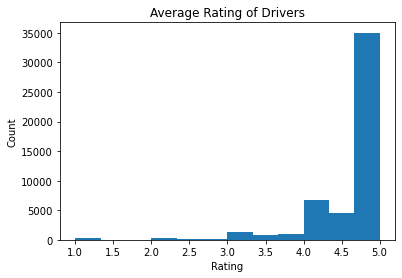

In [58]:
ax = df.avg_rating_of_driver.plot(kind='hist', bins=12)
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
ax.set_title('Average Rating of Drivers')

This displays our negitively skewed data for average rating of drivers.

### 3.5 Scatter plot of Retained and Not Retained vs. Trips in the First 30 Days

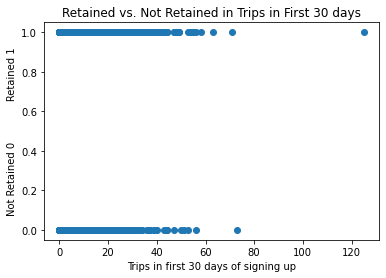

In [59]:
plt.scatter(df['trips_in_first_30_days'], df['retained'])
plt.xlabel('Trips in first 30 days of signing up')
plt.ylabel('Not Retained 0             Retained 1')
plt.title('Retained vs. Not Retained in Trips in First 30 days')
plt.show()

It seems as if retained users have more trips in the first 30 days than non-retained customers.

### 3.6 Table of Retained and Not Retained vs. Different Cities

In [60]:
retained_city_users = pd.crosstab(index=df['retained'], columns=df["city"], margins=True)  
retained_city_users.columns = ['Astapor',"King's Landing",'Winterfell','Total']
retained_city_users.index= ["Not Retained","Retained",'Total']
retained_city_users

,Astapor,King's Landing,Winterfell,Total
Not Retained,12306,3767,15123,31196
Retained,4228,6363,8213,18804
Total,16534,10130,23336,50000


Here we can see that more customers in Astapor & Winterfell are not retained customers. The company might want to see why and if they can retain more shares of customers in these two cities.

## 4. Predictive Model if User will be Active in the 6th Month

Import the appropriate packages for our model.

In [119]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

### 4.1 Get Dummies for Object Columns

Lets get dummy variables for city, phone and ulitmate black user so we can make them numeric in our data visualization and the model. First we will change the two columns that are objects.

In [62]:
cities_dum = pd.get_dummies(df['city'])
phone_dum = pd.get_dummies(df['phone'])

In [63]:
df = df.join(cities_dum).join(phone_dum)

In [64]:
df['ub_user'] = df['ultimate_black_user'].astype(int) 

In [65]:
df.tail()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,Astapor,King's Landing,Winterfell,Android,No Phone,iPhone,ub_user
49995,King's Landing,0,2014-01-25,5.0,1.0,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,1,0,1,0,0,0,1,0
49996,Astapor,1,2014-01-24,4.9,1.0,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,0,1,0,0,0,0,1,0
49997,Winterfell,0,2014-01-31,5.0,1.0,2014-05-22,Android,0.0,True,100.0,3.86,5.0,0,0,0,1,1,0,0,1
49998,Astapor,2,2014-01-14,3.0,1.0,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,0,1,0,0,0,0,1,0
49999,Astapor,0,2014-01-18,4.9,1.0,2014-04-20,Android,0.0,False,0.0,3.49,5.0,0,1,0,0,1,0,0,0


### 4.2 Drop Non Numeric Columns

Lets drop the columns with no numeric values since we created a new dummy variable for each of these columns. We need to do this for the model and visualization.

In [66]:
df = df.drop(['city', 'phone', 'ultimate_black_user'],axis=1)

In [67]:
df.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,retained,Astapor,King's Landing,Winterfell,Android,No Phone,iPhone,ub_user
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,46.2,3.67,5.0,1,0,1,0,0,0,1,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,50.0,8.26,5.0,0,1,0,0,1,0,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,100.0,0.77,5.0,0,1,0,0,0,0,1,0
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,80.0,2.36,4.9,1,0,1,0,0,0,1,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,82.4,3.13,4.9,0,0,0,1,1,0,0,0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trips_in_first_30_days  50000 non-null  int64         
 1   signup_date             50000 non-null  datetime64[ns]
 2   avg_rating_of_driver    50000 non-null  float64       
 3   avg_surge               50000 non-null  float64       
 4   last_trip_date          50000 non-null  datetime64[ns]
 5   surge_pct               50000 non-null  float64       
 6   weekday_pct             50000 non-null  float64       
 7   avg_dist                50000 non-null  float64       
 8   avg_rating_by_driver    50000 non-null  float64       
 9   retained                50000 non-null  int32         
 10  Astapor                 50000 non-null  uint8         
 11  King's Landing          50000 non-null  uint8         
 12  Winterfell              50000 non-null  uint8 

### 4.3 Split the X and Y Variables in a Train Test Split

Now we need to split the variable columns. The Y will be our predicted value of if the rider is retained, (1) or not retained, (0). The X will be all the other variables besides the date time columns since we can not use a model on time.

In [101]:
y = df['retained']
X = df[['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 
        'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver',
        'Astapor', "King's Landing", "Winterfell", "Android", "No Phone", "iPhone", "ub_user"]]

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

### 4.4 Logistic Regression Model

First lets try Logistic Regression for our classification problem.

In [135]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

In [136]:
cv_results_lr = cross_validate(lr, X_train, y_train, cv=10)
cv_results_lr

{'fit_time': array([0.6956141 , 1.26427031, 0.91147876, 1.1313448 , 0.94845915,
        1.08738708, 0.70559287, 1.00442362, 0.96444273, 1.10935712]),
 'score_time': array([0.0039978 , 0.00299788, 0.00299644, 0.00399852, 0.00399399,
        0.00299668, 0.00299811, 0.00199771, 0.00300217, 0.00399876]),
 'test_score': array([0.73342857, 0.72542857, 0.72342857, 0.71371429, 0.72428571,
        0.71114286, 0.72114286, 0.72171429, 0.71285714, 0.708     ])}

In [137]:
cv_scores_lr = cv_results_lr['test_score']
cv_scores_lr

array([0.73342857, 0.72542857, 0.72342857, 0.71371429, 0.72428571,
       0.71114286, 0.72114286, 0.72171429, 0.71285714, 0.708     ])

In [169]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [170]:
lr_grid_cv = GridSearchCV(lr, param_grid, refit = True, verbose = 3,n_jobs=-1) 

In [171]:
lr_grid_cv.fit(X_train, y_train)
lr_best_cv_results = cross_validate(lr_grid_cv.best_estimator_, X_train, y_train, cv=10)
lr_best_scores = lr_best_cv_results['test_score']
lr_best_scores

Fitting 5 folds for each of 7 candidates, totalling 35 fits


array([0.73428571, 0.72628571, 0.72371429, 0.71571429, 0.72571429,
       0.71057143, 0.72257143, 0.724     , 0.712     , 0.70657143])

In [172]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.7847142857142857, 0.005747404028013389)

The average of their cross validation grid search for logistic regression was .7847.

In [133]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[7951 1428]
 [2803 2818]]
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      9379
           1       0.66      0.50      0.57      5621

    accuracy                           0.72     15000
   macro avg       0.70      0.67      0.68     15000
weighted avg       0.71      0.72      0.71     15000



The test data was 15,000 rows. The recall of predicting if it was not a retained rider was the highest score in the classification report of 85%. The numbers are ok for this model but another type of model could be better. Now lets look at the ROC Curve:

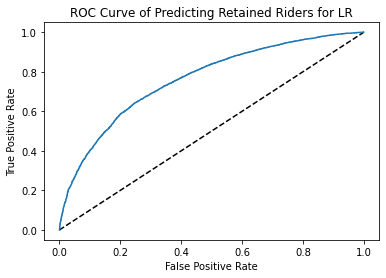

In [104]:
y_p_p = lr.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_p_p)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.title('ROC Curve of Predicting Retained Riders for LR')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [121]:
y_pred_proba = lr.predict_proba(X_test)[::,1]
auc = roc_auc_score(y_test, y_pred_proba)

print(auc)

0.7613556340850047


In [128]:
cv_auc_lr = cross_val_score(lr, X, y, cv = 5,scoring = 'roc_auc')

print(cv_auc_lr)
print(cv_auc_lr.mean())

[0.76473213 0.75773144 0.75282383 0.76170934 0.76884502]
0.7611683526415408


The AUC score and average is fair at .761. The logistic classification model is doing a fair job of predicting if the rider is retained or not but could be improved upon.

### 4.5 Random Forest Classifier Model

For our last model we will try the powerful random forest classifier model.

In [74]:
rf_pipeline=make_pipeline(
    StandardScaler(), 
    RandomForestClassifier(n_estimators = 100,
                           random_state = 42,
                           min_samples_split = 10,
                           bootstrap = True))

In [75]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(min_samples_split=10,
                                        random_state=42))])

In [76]:
y_tr_pred_rf = rf_pipeline.predict(X_train)
y_te_pred_rf = rf_pipeline.predict(X_test)

In [77]:
cv_results_rf = cross_validate(rf_pipeline, X_train, y_train, cv=10)
cv_results_rf

{'fit_time': array([3.26212931, 3.24112916, 3.53995681, 3.25711894, 3.30409265,
        4.0226779 , 3.23911142, 4.04169106, 3.7598474 , 3.5959065 ]),
 'score_time': array([0.11893129, 0.11693215, 0.11593318, 0.11893177, 0.11693549,
        0.1189146 , 0.1179328 , 0.11993098, 0.11793137, 0.11794996]),
 'test_score': array([0.784     , 0.78257143, 0.77314286, 0.782     , 0.784     ,
        0.778     , 0.78542857, 0.76485714, 0.76885714, 0.77914286])}

In [79]:
cv_scores_rf = cv_results_rf['test_score']
cv_scores_rf

array([0.784     , 0.78257143, 0.77314286, 0.782     , 0.784     ,
       0.778     , 0.78542857, 0.76485714, 0.76885714, 0.77914286])

In [80]:
param_grid = {'n_estimators':[100, 200, 500, 1000], 'max_depth':[10, 50, 100]}

In [82]:
rf_grid_cv = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3,n_jobs=-1) 

In [85]:
rf_grid_cv.fit(X_train, y_train)
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=10)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

Fitting 5 folds for each of 12 candidates, totalling 60 fits


array([0.78657143, 0.79542857, 0.78314286, 0.78457143, 0.78742857,
       0.77971429, 0.79114286, 0.77371429, 0.78457143, 0.78085714])

In [86]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.7847142857142857, 0.005747404028013389)

The mean of the Random Forest Grid Search cross validation is a .7847. Ran a grid search just be sure that this model is the best. This a little higher than the logistic regression.

In [111]:
rf_pipeline.fit(X_train,y_train)

y_pred = rf_pipeline.predict(X_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[7880 1499]
 [1907 3714]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82      9379
           1       0.71      0.66      0.69      5621

    accuracy                           0.77     15000
   macro avg       0.76      0.75      0.75     15000
weighted avg       0.77      0.77      0.77     15000



The recall, precision and f1 scores are all higher than the Logistic Regression Model that we ran earlier. I would recommend using this model for predicting if a rider is retained.

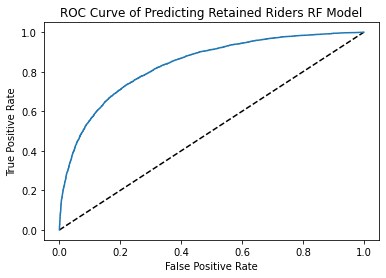

In [88]:
y_p_p = rf_pipeline.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_p_p)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.title('ROC Curve of Predicting Retained Riders RF Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [122]:
y_pred_proba =rf_pipeline.predict_proba(X_test)[::,1]
auc = roc_auc_score(y_test, y_pred_proba)

print(auc)

0.8365366411226662


In [127]:
cv_auc = cross_val_score(rf_pipeline, X, y, cv = 5,scoring = 'roc_auc')

print(cv_auc)
print(cv_auc.mean())

[0.84060058 0.83595976 0.83694964 0.84265655 0.84486717]
0.840206739832032


The area under the curve for Random Forest is higher than Logistic Regression at .8365. When we do a cross validation the average of the five is .84. The RF model is doing a good job of deciding if the rider is retained or not.

**Question 2: Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.**

Random Forest Model is the classifier I suggest Ultimate use going forward. Their precision, recall, auc and cross validation scores were all higher than logistic regression. RF is predicting who is a retained rider or not and has less false positives, and true negatives. I would also look into multiple other models just to see if they could predict if a rider was retained or not better. 

**3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).** 

Ultimate could improve rider retention by target marketing to ultimate black users as nearly half of them were not retained. Not many riders in Astapor or Winterfell were retained from these cities. I would implement a campaign to retain these riders. When more data becomes available we could test our RF model again to ensure its accuracy. This would also help Ultimate to predict future sales earnings and customer volume in future quarters for long term rider retention.